In [6]:
from matplotlib import style
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression

# matplotlib defaults

plt.style.use("seaborn-v0_8-dark")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [8]:
cara = pd.read_csv('./data/cara.csv')
cara

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [10]:
numerical_dims = ["year", "price", "mileage", "tax", "mpg", "engineSize"]
cara[numerical_dims].var()


year          4.203918e+00
price         2.248071e+07
mileage       3.791633e+08
tax           3.845294e+03
mpg           1.025354e+02
engineSize    1.869450e-01
dtype: float64

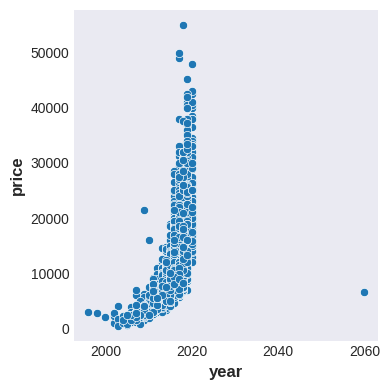

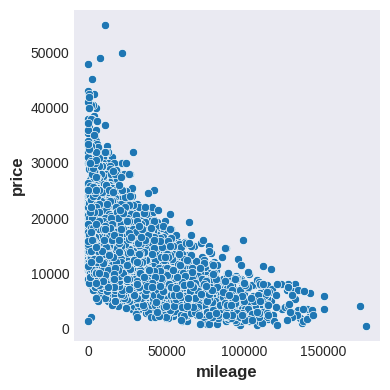

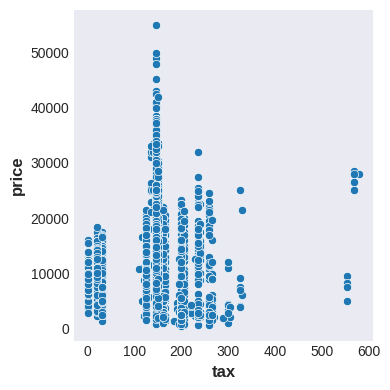

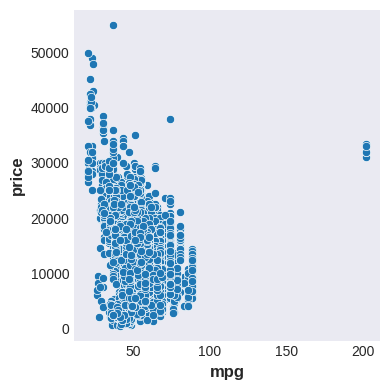

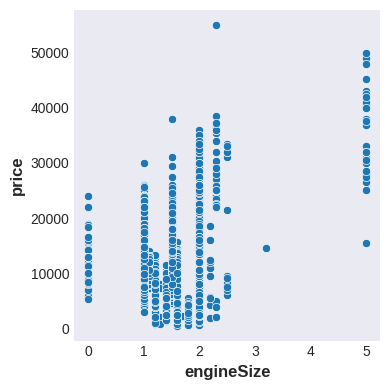

In [12]:
y = cara['price']
cara_ = cara.drop('price', axis=1)

cols = [col for col in cara_.columns if cara_[col].dtype in ['int64','float64']]

for idx, col in enumerate(cols):
    plt.figure(idx, figsize=(4,4))
    sns.scatterplot(x=col, y=y, data=cara_)
    plt.show

### SKLEARN PCA 

In [13]:
features = ['mileage','year','mpg','tax','engineSize']

X = cara_[features]

# normalizing features
X_norm = (X - X.mean(axis=0))/X.std(axis=0)

# principal component analysis on features
pca = PCA()

# fit and transform X_norm to PCA dataframe
X_pca = pca.fit_transform(X_norm)

# converting to dataframe
names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pcadf = pd.DataFrame(X_pca, columns=names)


print(X_pcadf.head())
print("+++++++++++++++++++++++++++++++++++++++++++++++++++")
print("shape of pca df:", X_pcadf.shape)

        PC1       PC2       PC3       PC4       PC5
0 -0.575611 -0.368421 -0.708761  0.371575 -0.224397
1 -1.059305 -0.623569 -0.499118  0.275858 -0.125147
2 -0.679683 -0.423364 -0.687725  0.308659 -0.342023
3 -1.771358  0.858840 -0.159534 -0.833414  0.574171
4 -1.810537 -0.426270 -0.659147 -0.402589  0.187178
+++++++++++++++++++++++++++++++++++++++++++++++++++
shape of pca df: (17965, 5)


In [14]:
pca.singular_values_

array([189.10834173, 167.05350962, 113.43209754,  92.58589638,
        68.64525512])

### PCA from Scratch

In [15]:
# we will perform PCA from scratch using numpy library
# X_norm is the Z-scoretransformed dataframe in our dataset

# convert cov_matrix from the X_norm
cov_matrix = np.cov(X_norm.T)
print("Convariance matrix: ", cov_matrix)

Convariance matrix:  [[ 1.         -0.70789926  0.12007683 -0.26055045  0.2150014 ]
 [-0.70789926  1.         -0.02296881  0.29845652 -0.13735825]
 [ 0.12007683 -0.02296881  1.         -0.50301254 -0.26052712]
 [-0.26055045  0.29845652 -0.50301254  1.          0.18431146]
 [ 0.2150014  -0.13735825 -0.26052712  0.18431146  1.        ]]


In [17]:
# from COV_MATRIX calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvectors:", eigenvectors)
print("Eigenvalues:", eigenvalues)

Eigenvectors: [[ 0.5809945  -0.30672577  0.65666384  0.35123476 -0.11743699]
 [-0.57200807  0.30155231  0.6778961   0.05749211  0.34499929]
 [ 0.3198565   0.55811472 -0.25087814  0.57436467  0.43973307]
 [-0.48160177 -0.39623711 -0.18663366  0.73028686 -0.20713489]
 [ 0.03168146 -0.58863369 -0.10713317 -0.10057401  0.79430096]]
Eigenvalues: [1.99075734 1.55348893 0.2623119  0.47718483 0.716257  ]


In [18]:
# sort the eigen values and eigen vectors in descending order
eig_pairs = [(eigenvalues[index],eigenvectors[:,index]) for index in range(len(eigenvalues))]

# sort the pairs
eig_pairs.sort()

# reverse to make it in correct order
eig_pairs.reverse()
print(eig_pairs)

# extract the sorted eiganvalues and eiganvectors
eigenvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigenvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# print sorted eigan values
print("Sorted eigan values:", eigenvalues_sorted)

[(1.9907573430794756, array([ 0.5809945 , -0.57200807,  0.3198565 , -0.48160177,  0.03168146])), (1.5534889266247647, array([-0.30672577,  0.30155231,  0.55811472, -0.39623711, -0.58863369])), (0.7162570002652363, array([-0.11743699,  0.34499929,  0.43973307, -0.20713489,  0.79430096])), (0.47718482565374665, array([ 0.35123476,  0.05749211,  0.57436467,  0.73028686, -0.10057401])), (0.2623119043767757, array([ 0.65666384,  0.6778961 , -0.25087814, -0.18663366, -0.10713317]))]
Sorted eigan values: [1.9907573430794756, 1.5534889266247647, 0.7162570002652363, 0.47718482565374665, 0.2623119043767757]


In [21]:
# plot the variance plots using sorted eigenvalues and eigenvectors
total = sum(eigenvalues_sorted)
var_explained = [(i/total) for i in eigenvalues_sorted]

# calculate cumulative variance
cum_var_exp = np.cumsum(var_explained)
cum_var_exp

array([0.39815147, 0.70884925, 0.85210065, 0.94753762, 1.        ])

In [22]:
# transforming original dataframe into PCA
vect = np.array(eigenvectors_sorted) 

# dot product to create principal components analysis
X_vect_pca = np.dot(X_norm,vect.T)

pd.DataFrame(X_vect_pca)

,0,1,2,3,4
0,-0.575611,0.368421,-0.708761,0.371575,-0.224397
1,-1.059305,0.623569,-0.499118,0.275858,-0.125147
2,-0.679683,0.423364,-0.687725,0.308659,-0.342023
3,-1.771358,-0.858840,-0.159534,-0.833414,0.574171
4,-1.810537,0.426270,-0.659147,-0.402589,0.187178
...,...,...,...,...,...
17960,0.264402,-0.321232,-0.666652,0.087592,0.074376
17961,-0.858574,-0.772293,-0.438807,-0.309084,-0.035392
17962,1.931960,0.304023,-0.962019,-0.679221,-0.020253
17963,1.072632,0.757961,0.961974,-0.971680,-1.182183


[0.39815147 0.31069779 0.1432514  0.09543697 0.05246238]


<function matplotlib.pyplot.show(close=None, block=None)>

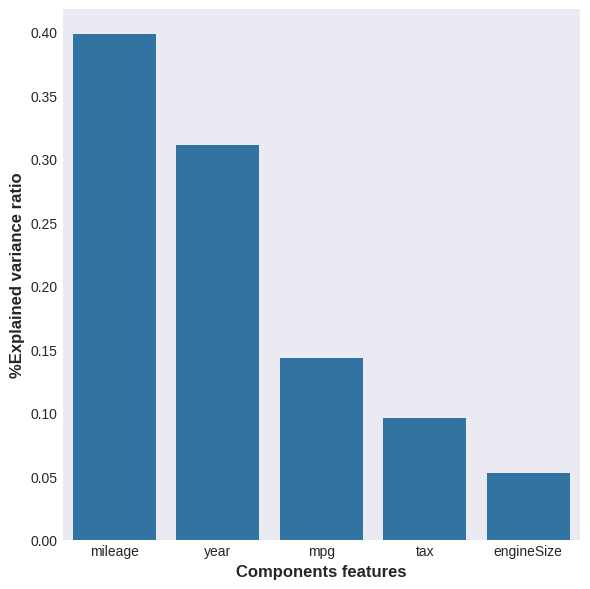

In [23]:
evr = pca.explained_variance_ratio_
print(evr)
features = ['mileage','year','mpg','tax','engineSize']
    
# plot the EVR using matplotlib pyplot    
plt.figure(figsize=(6,6))
sns.barplot(x=np.array(features), y=evr)
plt.xlabel("Components features")
plt.ylabel("%Explained variance ratio")
plt.show

[1.99075734 1.55348893 0.716257   0.47718483 0.2623119 ]


<function matplotlib.pyplot.show(close=None, block=None)>

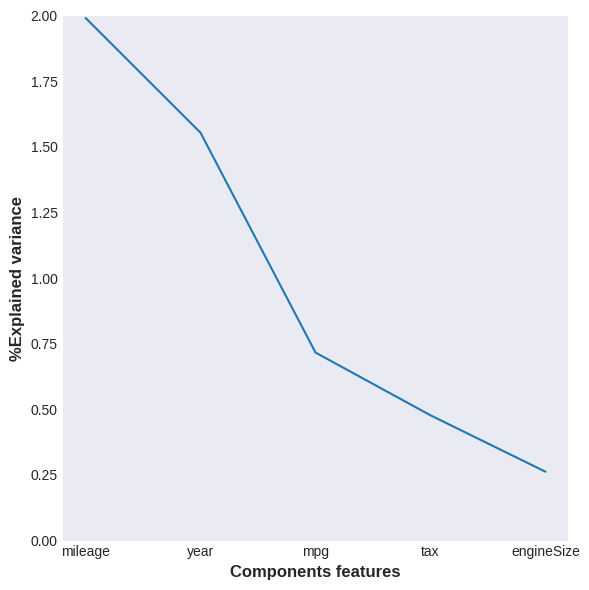

In [24]:
ev = pca.explained_variance_
print(ev)

features = ['mileage','year','mpg','tax','engineSize']


plt.figure(figsize=(6,6))
sns.lineplot(x=np.array(features), y=ev)
plt.xlabel("Components features")
plt.ylabel("%Explained variance")
plt.ylim(0,2)
plt.show

[1.99075734 3.54424627 4.26050327 4.7376881  5.        ]


<function matplotlib.pyplot.show(close=None, block=None)>

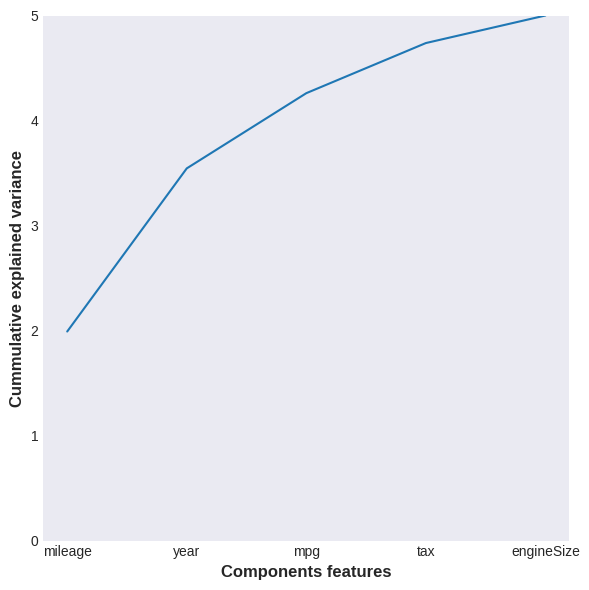

In [25]:
evc = np.cumsum(pca.explained_variance_)
print(evc)

features = ['mileage','year','mpg','tax','engineSize']


plt.figure(figsize=(6,6))
sns.lineplot(x=np.array(features), y=evc)
plt.xlabel("Components features")
plt.ylabel("Cummulative explained variance")
plt.ylim(0,5)
plt.show

In [26]:
loadings = pd.DataFrame(pca.components_.T , 
                        index=np.array(features), 
                        columns=names)

loadings

,PC1,PC2,PC3,PC4,PC5
mileage,0.580994,0.306726,-0.117437,0.351235,0.656664
year,-0.572008,-0.301552,0.344999,0.057492,0.677896
mpg,0.319856,-0.558115,0.439733,0.574365,-0.250878
tax,-0.481602,0.396237,-0.207135,0.730287,-0.186634
engineSize,0.031681,0.588634,0.794301,-0.100574,-0.107133


In [27]:
pca.noise_variance_

0.0

In [28]:
# covariance matrix of principal components
pca.get_covariance()

array([[ 1.        , -0.70789926,  0.12007683, -0.26055045,  0.2150014 ],
       [-0.70789926,  1.        , -0.02296881,  0.29845652, -0.13735825],
       [ 0.12007683, -0.02296881,  1.        , -0.50301254, -0.26052712],
       [-0.26055045,  0.29845652, -0.50301254,  1.        ,  0.18431146],
       [ 0.2150014 , -0.13735825, -0.26052712,  0.18431146,  1.        ]])

In [29]:
y = cara['price']

mi_score = mutual_info_regression(X_pcadf,y, discrete_features=False)
mi_score = pd.Series(mi_score, index=X_pcadf.columns, name="MI_SCORE")

print(mi_score)

PC1    0.537282
PC2    0.342162
PC3    0.336456
PC4    0.239585
PC5    0.109518
Name: MI_SCORE, dtype: float64
